In [1]:
%matplotlib inline
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# ライブラリのimport
# NumPy用ライブラリ
import numpy as np
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib
# pandas用ライブラリ
import pandas as pd
# データフレーム表示用関数
from IPython.display import display
# seaborn
import seaborn as sns
# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

## 1.3.1 離散分布
### コード1.1 くじ引き問題の確率分布の可視化プログラム

Text(0.5, 1.0, 'くじ引き問題の確率分布の可視化')

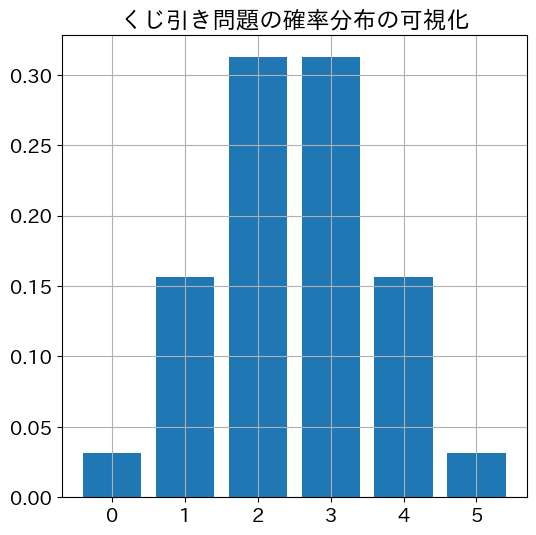

In [3]:
from scipy.special import comb
N = 5
X = range(N + 1)
Y = [comb(N, i) / 2 ** N for i in X]
plt.bar(X, Y)
plt.title('くじ引き問題の確率分布の可視化')

### コード1.2 くじ引き問題の確率分布の可視化(N=1000)

Text(0.5, 1.0, 'くじ引き問題の確率分布の可視化(N=1000)')

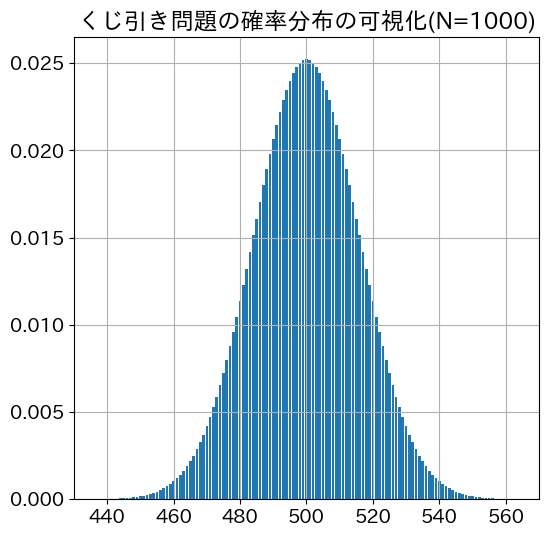

In [4]:
from scipy.special import comb
N = 1000
X = range(N + 1)
Y = [comb(N, i) / 2 ** N for i in X]
plt.bar(X, Y)
plt.xlim((430, 570))
plt.title('くじ引き問題の確率分布の可視化(N=1000)')

### コード1.3 確率分布と正規分布関数

Text(0.5, 1.0, '確率分布と正規分布関数')

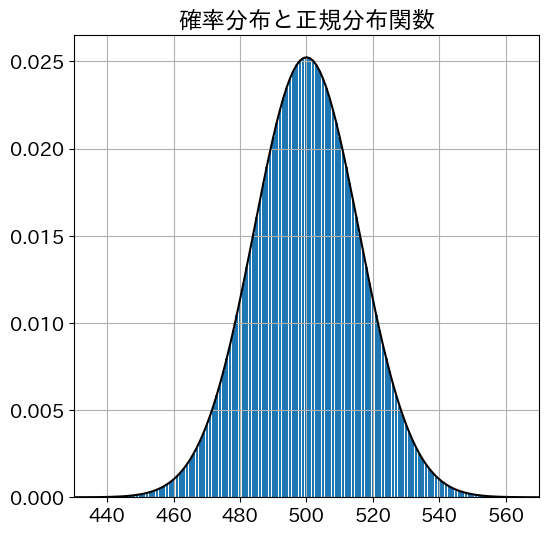

In [5]:
# 正規分布関数
def norm(x, mu, sigma):
    return np.exp(-((x - mu) / sigma) ** 2 / 2) / (np.sqrt(2 * np.pi) * sigma)

N = 1000

plt.xlim((430, 570))
x = np.arange(430, 571)

# 確率分布関数
y1 = [comb(N, i) / 2 ** N for i in x]
plt.bar(x, y1)

# 正規分布関数
mu = N / 2
sigma = np.sqrt(mu / 2)
y2 = norm(x, mu, sigma)
plt.plot(x, y2, c = 'k')

plt.title('確率分布と正規分布関数')

## 1.4.1 インポート文
### コード1.4 インポート文(PyMC,ArviZ)

In [6]:
import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.20.0
Running on ArviZ v0.20.0


## 1.4.2 確率モデル定義
### コード1.5 確率モデル定義用コード

In [7]:
# 確率モデルコンテキスト用インスタンス
model = pm.Model()

with model:
    # Binomial:二項分布の確率分布クラス
    # p: 二項分布の元になる試行の成功回数
    # n: 二項分布における試行回数
    # 'x': サンプルとして出力される確率変数
    x = pm.Binomial('x', p = 0.5, n = 5)

## 1.4.3 サンプリング
### コード1.6 サンプリング

In [8]:
with model:
    prior_samples = pm.sample_prior_predictive(random_seed = 42)

Sampling: [x]


## 1.5.1 Notebool UIを直接利用
### コード1.7 prior_samplesの実行

In [9]:
prior_samples

Inference data with groups:
	> prior

## 1.5.2 NumPy形式データを抽出
### コード1.8 NumPy形式データの抽出と簡単な分析

In [10]:
x_samples = prior_samples['prior']['x'].values
print('type: ', type(x_samples))
print('shape: ', x_samples.shape)
print('values: ', x_samples, '\n')

value_counts = pd.DataFrame(x_samples.reshape(-1)).value_counts().sort_index()
print(value_counts)

type:  <class 'numpy.ndarray'>
shape:  (1, 500)
values:  [[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3

## 1.5.3 ArviZによる分析
### コード1.9 ArviZによるサンプル値の集計

In [11]:
summary = az.summary(prior_samples, kind = 'stats')
display(summary)

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.000,4.000


### コード1.10 ArviZによる可視化実装例

Text(0.5, 1.0, 'ArviZによるサンプル値の可視化')

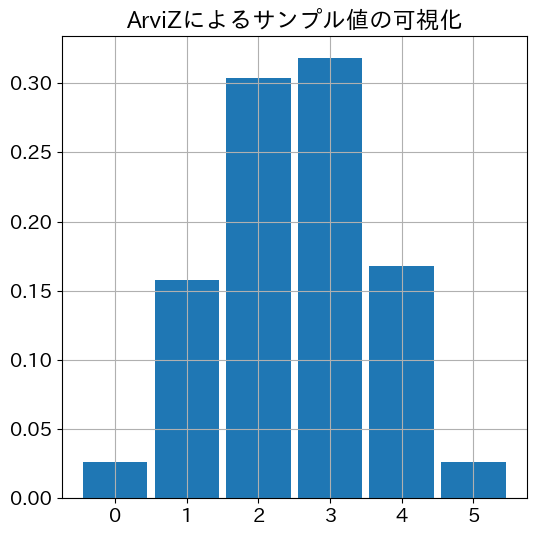

In [12]:
ax = az.plot_dist(x_samples)
ax.set_title('ArviZによるサンプル値の可視化')

### コード1.11 確率モデル定義用コード

In [13]:
model = pm.Model()

with model:
    x = pm.Binomial('x', p=0.5, n=5)
    prior_samples = pm.sample_prior_predictive(random_seed=42)

x_samples = prior_samples['prior']['x'].values

Sampling: [x]
